# Sentiment-based product recommendation system
This have two main modules.
1. Sentiment Analysis: We analyzed the user-review-text to check Positive or Negative review about product.
2. Recommendation system: This conains mainly recommendation based on Rating given to product. 

# Sentiment Analysis
## 1. EDA

In [1]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading review file
reviews = pd.read_csv('./dataset/sample30.csv')
print('Shape: ', reviews.shape)
reviews.head(2)

Shape:  (30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [3]:
reviews.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

## Extracting required columns
As we don't require all columns, So we'll extract only required columns.reviews_text will better choice than Reviews_title.

In [4]:
df_reviews = reviews[['id','reviews_rating', 'reviews_text','reviews_username','user_sentiment']]
print('Shape: ', df_reviews.shape)
df_reviews.head(20)

Shape:  (30000, 5)


,id,reviews_rating,reviews_text,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,walker557,Negative
5,AV16khLE-jtxr-f38VFn,1,My boyfriend and I bought this to spice things...,samantha,Negative
6,AV16khLE-jtxr-f38VFn,1,Bought this earlier today and was excited to c...,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,1,I bought this product for my husband and I to ...,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,1,My husband and I bought this for some extra fu...,cassie,Negative
9,AV16khLE-jtxr-f38VFn,1,Got as a surprise for my husband there is noth...,moore222,Positive


# 2. Data cleaning
### Null value Check

Treat the null values

In [5]:
df_reviews.isnull().sum()

id                   0
reviews_rating       0
reviews_text         0
reviews_username    63
user_sentiment       1
dtype: int64

In [6]:
# We have sufficent data and reviews_username is important field, so we can drop null data
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]
print('Shape:', df_reviews.shape)
df_reviews.isnull().sum()

Shape: (29936, 5)


id                  0
reviews_rating      0
reviews_text        0
reviews_username    0
user_sentiment      0
dtype: int64

We have clean data now. Lets evaluate user_sentiment and reviews_rating. Ideally these should be same.

In [7]:
df_reviews['user_sentiment_drived'] = list(map(lambda rating: 'Positive' if rating>2 else 'Negative', df_reviews.reviews_rating))
df_reviews.head(20)

,id,reviews_rating,reviews_text,reviews_username,user_sentiment,user_sentiment_drived
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,joshua,Positive,Positive
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,dorothy w,Positive,Positive
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.,dorothy w,Positive,Positive
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,rebecca,Negative,Negative
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,walker557,Negative,Negative
5,AV16khLE-jtxr-f38VFn,1,My boyfriend and I bought this to spice things...,samantha,Negative,Negative
6,AV16khLE-jtxr-f38VFn,1,Bought this earlier today and was excited to c...,raeanne,Negative,Negative
7,AV16khLE-jtxr-f38VFn,1,I bought this product for my husband and I to ...,kimmie,Negative,Negative
8,AV16khLE-jtxr-f38VFn,1,My husband and I bought this for some extra fu...,cassie,Negative,Negative
9,AV16khLE-jtxr-f38VFn,1,Got as a surprise for my husband there is noth...,moore222,Positive,Negative


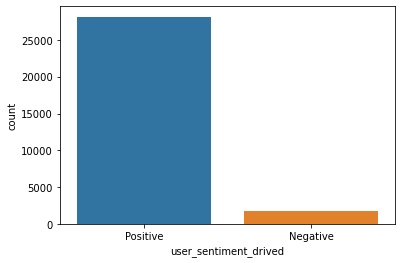

In [8]:
#plotting application data distribution
sns.countplot(x='user_sentiment_drived', data= df_reviews)
plt.show()

In [9]:
df_reviews.user_sentiment_drived.value_counts()

Positive    28145
Negative     1791
Name: user_sentiment_drived, dtype: int64

In [10]:
def checkEqual(review):
    if review['user_sentiment'] == review['user_sentiment_drived']:
        return 0
    return 1
df_reviews['user_segment_unequal'] = df_reviews.apply(checkEqual, axis=1)
df_reviews[df_reviews['user_segment_unequal'] == 1].head(10)

,id,reviews_rating,reviews_text,reviews_username,user_sentiment,user_sentiment_drived,user_segment_unequal
9,AV16khLE-jtxr-f38VFn,1,Got as a surprise for my husband there is noth...,moore222,Positive,Negative,1
11,AV16khLE-jtxr-f38VFn,1,Purchased this thinking it would have some sor...,bre234,Positive,Negative,1
14,AV16khLE-jtxr-f38VFn,1,First time purchase of this type of product. M...,nicole,Positive,Negative,1
19,AV16khLE-jtxr-f38VFn,3,It was my first time using k-y. It didn't do a...,browns fan,Negative,Positive,1
42,AV1h6Gu0glJLPUi8IjA_,3,You would think it's convenient to have bubble...,gardenbunny318,Negative,Positive,1
54,AV1l8zRZvKc47QAVhnAv,1,I used (and loved) this product for several ye...,alnscoob97,Positive,Negative,1
56,AV1l8zRZvKc47QAVhnAv,1,I am so disappointed! I have used this product...,jacmary,Positive,Negative,1
58,AV1l8zRZvKc47QAVhnAv,1,It took me so long to find a moisturizer that ...,kayc,Positive,Negative,1
60,AV1l8zRZvKc47QAVhnAv,1,Olay don't work for me I have overly dry skin....,piggyboy420,Positive,Negative,1
64,AV1l8zRZvKc47QAVhnAv,2,While this product probably does leave faces f...,jharris20,Positive,Negative,1


#### As per observation the provided user_sentiment is not showing correct sentiment but rating shows more accurate. So we have created user_sentiment_drived for sentiment from rating and will go with it.
Dropping extra two columns.

In [11]:
df_reviews = df_reviews.drop(['user_sentiment', 'user_segment_unequal'], axis=1)

In [12]:
print('Shape: ', df_reviews.shape)
df_reviews.head()

Shape:  (29936, 5)


,id,reviews_rating,reviews_text,reviews_username,user_sentiment_drived
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,walker557,Negative


We have clean table and can perform NLP on it

# 3. Text preprocessing
### NLP

In [13]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#converting into string
df_reviews['reviews_text'] = df_reviews['reviews_text'].astype('str')

In [15]:
# Remove punctuation 
df_reviews['reviews_text'] = df_reviews['reviews_text'].str.replace('[^\w\s]','')

In [16]:
# Remove Stopwords
stop = stopwords.words('english')
df_reviews['reviews_text'] = df_reviews['reviews_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
# Converted to lower case
df_reviews['reviews_text'] = df_reviews['reviews_text'].str.lower()

In [18]:
### import necessary libraries
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [19]:
# Lennatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    tokens = word_tokenize(text)
    lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join([str(elem) for elem in lemmatized])


In [20]:
df_reviews.head()

,id,reviews_rating,reviews_text,reviews_username,user_sentiment_drived
0,AV13O1A8GV-KLJ3akUyj,5,love album good hip hop side current pop sound...,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,5,good flavor this review collected part promotion,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,5,good flavor,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,1,i read reviews looking buying one couples lubr...,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,1,my husband bought gel us the gel caused irrita...,walker557,Negative


In [21]:
df_reviews['reviews_text_lem'] = df_reviews.reviews_text.map(lemmatizer)
df_reviews.head()

,id,reviews_rating,reviews_text,reviews_username,user_sentiment_drived,reviews_text_lem
0,AV13O1A8GV-KLJ3akUyj,5,love album good hip hop side current pop sound...,joshua,Positive,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,5,good flavor this review collected part promotion,dorothy w,Positive,good flavor this review collected part promotion
2,AV14LG0R-jtxr-f38QfS,5,good flavor,dorothy w,Positive,good flavor
3,AV16khLE-jtxr-f38VFn,1,i read reviews looking buying one couples lubr...,rebecca,Negative,i read review looking buying one couple lubric...
4,AV16khLE-jtxr-f38VFn,1,my husband bought gel us the gel caused irrita...,walker557,Negative,my husband bought gel u the gel caused irritat...


# 3. Feature Extraction

In [22]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
x=df_reviews['reviews_text_lem'] 
y=df_reviews['user_sentiment_drived']

In [25]:
# Split the dataset into test and train
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [26]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',    # Remove accents and perform other character normalization during the preprocessing step. 
    analyzer='word',            # Whether the feature should be made of word or character n-grams.
    token_pattern=r'\w{1,}',    # Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'
    ngram_range=(1, 3),         # The lower and upper boundary of the range of n-values for different n-grams to be extracted
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(X_train)    # Fiting it on Train
train_word_features = word_vectorizer.transform(X_train)  # Transform on Train

In [27]:
## transforming the train and test datasets
X_train_transformed = word_vectorizer.transform(X_train.tolist())
X_test_transformed = word_vectorizer.transform(X_test.tolist())

# # Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (20955, 372947)
y_train (20955,)
X_test_transformed (8981, 372947)
y_test (8981,)


# Model Building

## Logistic regression

In [28]:
logit = LogisticRegression()
logit.fit(X_train_transformed,y_train)

LogisticRegression()

In [29]:
# Prediction Train Data
y_pred_train= logit.predict(X_train_transformed)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Logistic Regression accuracy 0.9644476258649487
              precision    recall  f1-score   support

    Negative       0.41      0.99      0.58       513
    Positive       1.00      0.96      0.98     20442

    accuracy                           0.96     20955
   macro avg       0.70      0.98      0.78     20955
weighted avg       0.99      0.96      0.97     20955



In [30]:
# Prediction Test Data
y_pred_test = logit.predict(X_test_transformed)

#Model Performance on Test Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Logistic Regression accuracy 0.9630330698140519
              precision    recall  f1-score   support

    Negative       0.41      0.97      0.57       229
    Positive       1.00      0.96      0.98      8752

    accuracy                           0.96      8981
   macro avg       0.70      0.97      0.78      8981
weighted avg       0.98      0.96      0.97      8981



In [31]:
from collections import Counter

In [32]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'Positive': 19711, 'Negative': 1244})
After Counter({'Positive': 19711, 'Negative': 19711})


In [33]:
logit_sm = LogisticRegression()
logit_sm.fit(X_train_transformed_sm,y_train_sm)

LogisticRegression()

In [34]:
# Prediction Train Data
y_pred_train_sm= logit_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

Logistic Regression accuracy 0.9971335802343869
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     19792
    Positive       1.00      1.00      1.00     19630

    accuracy                           1.00     39422
   macro avg       1.00      1.00      1.00     39422
weighted avg       1.00      1.00      1.00     39422



In [35]:
# Prediction Test Data
y_pred_test = logit_sm.predict(X_test_transformed)

print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

Logistic Regression accuracy 0.9589132613294733
              precision    recall  f1-score   support

    Negative       0.76      0.64      0.69       650
    Positive       0.97      0.98      0.98      8331

    accuracy                           0.96      8981
   macro avg       0.86      0.81      0.83      8981
weighted avg       0.96      0.96      0.96      8981

[[ 414  236]
 [ 133 8198]]


## Random Forest

In [36]:
classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
classifier.fit(X_train_transformed_sm,y_train_sm)

RandomForestClassifier(n_jobs=-1, random_state=50)

In [37]:
# Prediction Train Data
y_pred_train_sm= classifier.predict(X_train_transformed_sm)

print("Random Forest Model accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

Random Forest Model accuracy 0.9999746334534017
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     19710
    Positive       1.00      1.00      1.00     19712

    accuracy                           1.00     39422
   macro avg       1.00      1.00      1.00     39422
weighted avg       1.00      1.00      1.00     39422



In [38]:
# Prediction Test Data
y_pred_test = classifier.predict(X_test_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

Random Forest Model accuracy 0.9677096091749249
              precision    recall  f1-score   support

    Negative       0.47      0.99      0.64       261
    Positive       1.00      0.97      0.98      8720

    accuracy                           0.97      8981
   macro avg       0.74      0.98      0.81      8981
weighted avg       0.98      0.97      0.97      8981

[[ 259    2]
 [ 288 8432]]


# XGBoost

In [39]:
from xgboost import XGBClassifier

In [40]:
classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)

In [41]:
xgbc = XGBClassifier(n_estimators=100, random_state=seed, n_jobs=-1) 

In [49]:
xgbc.fit(X_train_transformed_sm,y_train_sm)

[15:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=50,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
# Prediction Train Data
y_pred_train_sm= xgbc.predict(X_train_transformed_sm)

print("XGBoost Model accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

XGBoost Model accuracy 0.9885343209375476
              precision    recall  f1-score   support

    Negative       0.98      0.99      0.99     19465
    Positive       0.99      0.98      0.99     19957

    accuracy                           0.99     39422
   macro avg       0.99      0.99      0.99     39422
weighted avg       0.99      0.99      0.99     39422



In [51]:
# Prediction Test Data
y_pred_test = xgbc.predict(X_test_transformed)

print("XGBoost Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

XGBoost Model accuracy 0.967598262999666
              precision    recall  f1-score   support

    Negative       0.54      0.88      0.67       336
    Positive       1.00      0.97      0.98      8645

    accuracy                           0.97      8981
   macro avg       0.77      0.93      0.83      8981
weighted avg       0.98      0.97      0.97      8981

[[ 296   40]
 [ 251 8394]]


# Sentiment analysis summary

Test data Accuracy
    
-		Logistic Regression accuracy 0.9630330698140
-		Random Forest Model accuracy 0.9677096091749249
-		XGBoost Model accuracy 0.967598262999666

Accuracy is very close in all three model. Random Forest is winner with very close margin. So we'll use Random Rorest

# -------------------------------------------------------------------------------

# Recommendation system

## 1 EDA


### 1.1 Import Lib and load data

In [1]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading review file
reviews = pd.read_csv('./dataset/sample30.csv')
print('Shape: ', reviews.shape)
reviews.head()

Shape:  (30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


### Select only necessary columns only

In [4]:
df_reviews = reviews[['name','reviews_rating','reviews_username']]
print('Shape: ', df_reviews.shape)
df_reviews.head(2)

Shape:  (30000, 3)


,name,reviews_rating,reviews_username
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w


### There are few cases where we have duplicate rows and null values. Let's remove duplicate rows and null value
Removing duplicate rows is nessary for Pivot table.

In [5]:
df_reviews = df_reviews.drop_duplicates(subset=["name", "reviews_username"])

In [6]:
df_reviews.isnull().sum()

name                 0
reviews_rating       0
reviews_username    17
dtype: int64

In [7]:
# We have sufficent data and reviews_username is important field, so we can drop null data
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]
print('Shape:', df_reviews.shape)
df_reviews.isnull().sum()

Shape: (27588, 3)


name                0
reviews_rating      0
reviews_username    0
dtype: int64

We have now clean data and there are 27588 rows.

### Spliting the dataset into train and test

In [8]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_reviews, test_size=0.30, random_state=31)

In [9]:
print(train.shape)
print(test.shape)

(19311, 3)
(8277, 3)


In [14]:
# Pivot the train ratings' dataset into matrix format in which columns are product name and the rows are reviews_username.
df_pivot = test.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

name,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10ten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11111111aaaaaaaaaaaaaaaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_pivot.shape

(7948, 212)

In [16]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [17]:
# The product not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [18]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [19]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
dummy_train.shape

(17891, 255)

# Cosine Similarity

In [21]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [22]:
user_correlation.shape

(7948, 7948)

# Adjusted Cosine

In [23]:
# Create a user-product matrix.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [24]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the product for each user around 0 mean

In [25]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [26]:
from sklearn.metrics.pairwise import pairwise_distances

In [27]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Prediction - User User

In [28]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
user_predicted_ratings.shape

(17891, 255)

In [31]:
# Not Rated users
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Take the user ID as input.
# user_input = input("Enter your user name")
# print(user_input)
# d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
# d = pd.merge(d,reviews,left_on='name',right_on='name', how = 'left')
# d.head()

# Evaluation - User User

In [33]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1106, 3)

In [34]:
common.head()

,name,reviews_rating,reviews_username
4245,Hoover174 Platinum Collection153 Lightweight B...,5,teresa
19882,Clorox Disinfecting Bathroom Cleaner,5,shaba
26308,Stargate (ws) (ultimate Edition) (director's C...,4,jayjay
6284,"Hormel Chili, No Beans",3,meme
15580,D-Con Mice Bait Station - 3ct,5,nana


In [35]:
# convert into the user-based matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [36]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [37]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17881,17882,17883,17884,17885,17886,17887,17888,17889,17890
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
common.head(1)

,name,reviews_rating,reviews_username
4245,Hoover174 Platinum Collection153 Lightweight B...,5,teresa


In [39]:
user_correlation_df.columns

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       17881, 17882, 17883, 17884, 17885, 17886, 17887, 17888, 17889, 17890],
      dtype='object', length=17891)

In [40]:
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17881,17882,17883,17884,17885,17886,17887,17888,17889,17890
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
list_name = common.reviews_username.tolist()
user_correlation_df.columns = df_subtracted.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]
print('Shape: ',user_correlation_df_1.shape)
user_correlation_df_1.head()

Shape:  (925, 17891)


,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
print('Shape: ', user_correlation_df_3.shape)
user_correlation_df_3.head()

Shape:  (925, 925)


,00sab00,1234,1943,37f5p,50cal,aaron,abbey,abby,abismomy,acv4217,...,wil27,wildman,willy,wimbly,wolverine,xmom,yeyo,yummy,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
user_correlation_df_3.shape

(925, 925)

In [44]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(
    
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

In [46]:
dummy_test.shape

(925, 126)

In [47]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head(2)                  

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\BA06878\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\BA06878\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [50]:
common_ = common.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)
common_.shape

(925, 126)

In [51]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [52]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5597195521751623


# Item Based Similarity

In [53]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
from sklearn.metrics.pairwise import pairwise_distances

In [56]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [57]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [58]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
print('Shape: ', item_predicted_ratings.shape)
item_predicted_ratings

Shape:  (17891, 255)


array([[0.        , 0.        , 0.        , ..., 0.01928584, 0.        ,
        0.        ],
       [0.        , 0.01703714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0450749 , 0.        , ..., 0.00914624, 0.00217527,
        0.01132432],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00012819, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01333037,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00025637, 0.        ,
        0.        ]])

In [59]:
dummy_train.shape

(17891, 255)

In [60]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019286,0.000000,0.000000
00sab00,0.0,0.017037,0.0,0.0,0.0,0.0,0.0,0.0,0.00293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.045075,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009146,0.002175,0.011324
02dakota,0.0,0.075125,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015244,0.003625,0.018874
02deuce,0.0,0.060100,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012195,0.002900,0.015099


### Finding the top 20 recommendation for the *user*

In [61]:
# Take the user ID as input
# user_input = input("Enter your user id")
# print(user_input)
# d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
# d = pd.merge(d,reviews,left_on='name',right_on='name', how = 'left')
# d.head()

# Evaluation - Item Item

In [62]:
common =  test[test.name.isin(train.name)]
print('Shape:',common.shape)
common.head()

Shape: (8253, 3)


,name,reviews_rating,reviews_username
22245,Alex Cross (dvdvideo),4,albertacanada
23511,Godzilla 3d Includes Digital Copy Ultraviolet ...,4,reeree
7965,Clorox Disinfecting Wipes Value Pack Scented 1...,5,adash75
4245,Hoover174 Platinum Collection153 Lightweight B...,5,teresa
11201,Clorox Disinfecting Wipes Value Pack Scented 1...,5,zhynellebb


In [63]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
list_name = common.name.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [66]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
100:Complete First Season (blu-Ray),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Alex Cross (dvdvideo),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003725,0.0,0.0


In [67]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [68]:
common_item_based_matrix.shape

(7926, 196)

In [69]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.T.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01242535, 0.03266576,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00660728, 0.        ,
        0.00032046],
       [0.00799822, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01314848, 0.        ,
        0.        ]])

In [70]:
common_item_predicted_ratings.shape

(196, 7926)

In [71]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)
common_item_predicted_ratings.shape

(196, 7926)

In [72]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [73]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\BA06878\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\BA06878\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [74]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [75]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.571158589545605


## Pickle the selected file

In [76]:
import pickle

In [79]:
file = './pickle/recommend_data.pkl'
fileObj = open(file, 'wb')
pickle.dump(item_final_rating, fileObj)
fileObj.close()

In [80]:
fileReadObj = open(file, 'rb')
pickleObj = pickle.load(fileReadObj)
pickleObj.shape

(17891, 255)

In [81]:
def recomm(item_rating, user_id):
    return item_rating.loc[user_id].sort_values(ascending=False)[0:20]

In [84]:
recommend_file = './pickle/recommendFn.pkl'
fileObj1 = open(recommend_file, 'wb')
pickle.dump(recomm, fileObj1)
fileObj.close()

In [87]:
fileReadObj1 = open(recommend_file, 'rb')
recommend = pickle.load(fileReadObj1)
val = recommend(item_final_rating, '00sab00')

In [88]:
list(val.index)[0]

'Jolly Time Select Premium Yellow Pop Corn'

In [89]:
val

name
Jolly Time Select Premium Yellow Pop Corn                                                        0.055762
Bilbao Nightstand Gray Oak - South Shore                                                         0.050248
Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White                                           0.045734
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  0.023402
100:Complete First Season (blu-Ray)                                                              0.017037
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com    0.010978
Jason Aldean - They Don't Know                                                                   0.010718
The Resident Evil Collection 5 Discs (blu-Ray)                                                   0.010279
Musselman Apple Sauce, Cinnamon, 48oz                                                            0.007999
Ogx Conditioner, Hydrating Teatree Mint  

# Summary

- rmse for Item Based recommendation: 3.571158589545605
- rmse for User Based recommendation: 2.5597195521751623

Though both rmase is not upto mark here. But User Based recommendation is better. So we have pickled used Based recommendation prediction